In [2]:
### imports

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
### reading the data 

arrest_df = pd.read_csv('https://drive.usercontent.google.com/download?id=1GQN967mTfWD0K7UhhjBYJlyUBURHj4e3&confirm=xxx')

In [4]:
### remove unnecesary columns and get year in datetime format 


arrest_df = arrest_df.drop(['Cross Street', 'Booking Date','Booking Time', 'Booking Location', 'Booking Location Code',], axis=1)
arrest_df = arrest_df.dropna(subset=['Area ID', 'Area Name', 'Reporting District', 
                                     'Age', 'Sex Code', 'Descent Code', 'LAT', 'LON', 'Location'])
arrest_df.insert(3,"Year", pd.to_datetime(arrest_df['Arrest Date']).dt.year)

In [5]:
arrest_df.columns

Index(['Report ID', 'Report Type', 'Arrest Date', 'Year', 'Time', 'Area ID',
       'Area Name', 'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Disposition Description', 'Address',
       'LAT', 'LON', 'Location'],
      dtype='object')

In [6]:
arrest_df = arrest_df.drop('Disposition Description', axis = 1)

In [7]:
##fix descent codes 
descent_codes_fixed = {
    'A': 'Asian', 
    'B': 'Black', 
    'C': 'Asian', 
    'D': 'Asian',
    'F': 'Asian', 
    'G': 'Pacific Islander',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Pacific Islander',
    'U': 'Pacific Islander',
    'V': 'Asian',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian'
}


arrest_df['Descent Code'] = arrest_df['Descent Code'].replace(descent_codes_fixed)


In [8]:
arrest_df['Descent Code'].value_counts()

Descent Code
Hispanic/Latin/Mexican            615844
Black                             379756
White                             248436
Other                              67878
Asian                               8424
American Indian/Alaskan Native       284
Pacific Islander                     249
Unknown                              112
Name: count, dtype: int64

In [9]:
###generating a pivot table with totals for neighborhood and race

arrest_race_pivot = pd.pivot_table(arrest_df, values = 'Report ID', index = 'Descent Code', aggfunc = 'count')

location_pivot = pd.pivot_table(arrest_df, values = 'Report ID', index = 'Area Name', aggfunc = 'count')



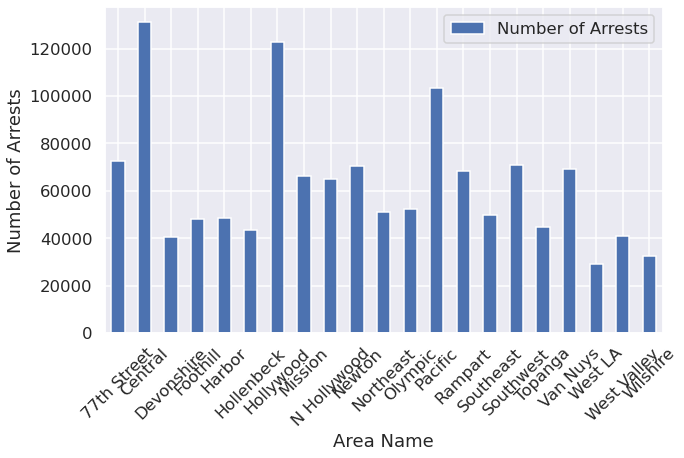

In [14]:
#Generate a plot of arrests across locations 
plot = location_pivot.plot(kind = 'bar', rot = 45, figsize = (10,6), align = 'center')

# Label the Axes 
plot.set_ylabel('Number of Arrests')
plot.set_xlabel('Area Name')

plot.legend(["Number of Arrests"])


### I'm really struggling wiht aligning the bar labels 


In [11]:
type(plot)

matplotlib.axes._subplots.AxesSubplot

In [ ]:
### generate a plot of arrests across racial groups 

In [ ]:
### plot arrests over years 

In [ ]:
### map the locations of arrests 